# Sourcing & Analyzing Time-Series Data

## This script contains the following:

* 1 - Import Data & Libraries
* 2 - Subsetting, wrangling, and cleaning time-series data  
* 3 - Time series analysis: decomposition
* 4 - Testing for stationarity
* 5 - Stationarizing the World Happiness Data

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Creating a path for the dataset
path = r'C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achievement6\World Happiness'

In [3]:
# Import the world happiness data
data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','World_Happiness_2015-2022.csv'))

In [4]:
data.head()

,Country,Region,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_support,Life_Expectancy,Freedom,Generosity,Corruption
0,Switzerland,Europa,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Europa,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Europa,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Europa,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,North_America,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [5]:
data.shape

(1230, 11)

### 2. Subsetting, wrangling, and cleaning time-series data

In [12]:
# Creating a new data set with the values of year and happiness score
data_sub = data[['Year','Happiness_Score']]

In [13]:
data_sub

,Year,Happiness_Score
0,2015,7.587
1,2015,7.561
2,2015,7.527
3,2015,7.522
4,2015,7.427
...,...,...
1225,2022,3.471
1226,2022,3.268
1227,2022,2.995
1228,2022,2.955


In [14]:
# grouping the data on the basis of 
# year and mean of happiness score
data_sub = data_sub.groupby(['Year']).mean()

In [15]:
data_sub

,Happiness_Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019
2018,5.375917
2019,5.407096
2020,5.473240
2021,5.532839
2022,5.553575


In [17]:
data_sub.shape

(8, 1)

In [18]:
# Check for missing values 
data_sub.isnull().sum()

# No missing values!

Happiness_Score    0
dtype: int64

In [19]:
# Check for duplicates
dups = data_sub.duplicated()
dups.sum()

# No dups!

0

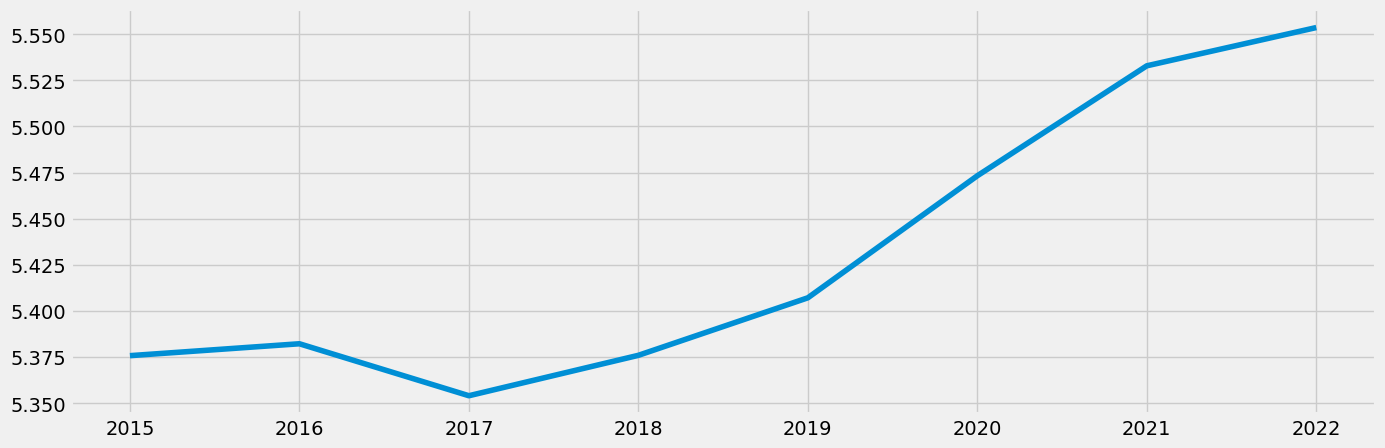

In [20]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

### 3. Time-series analysis: decomposition

In [21]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period= 4)

In [22]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

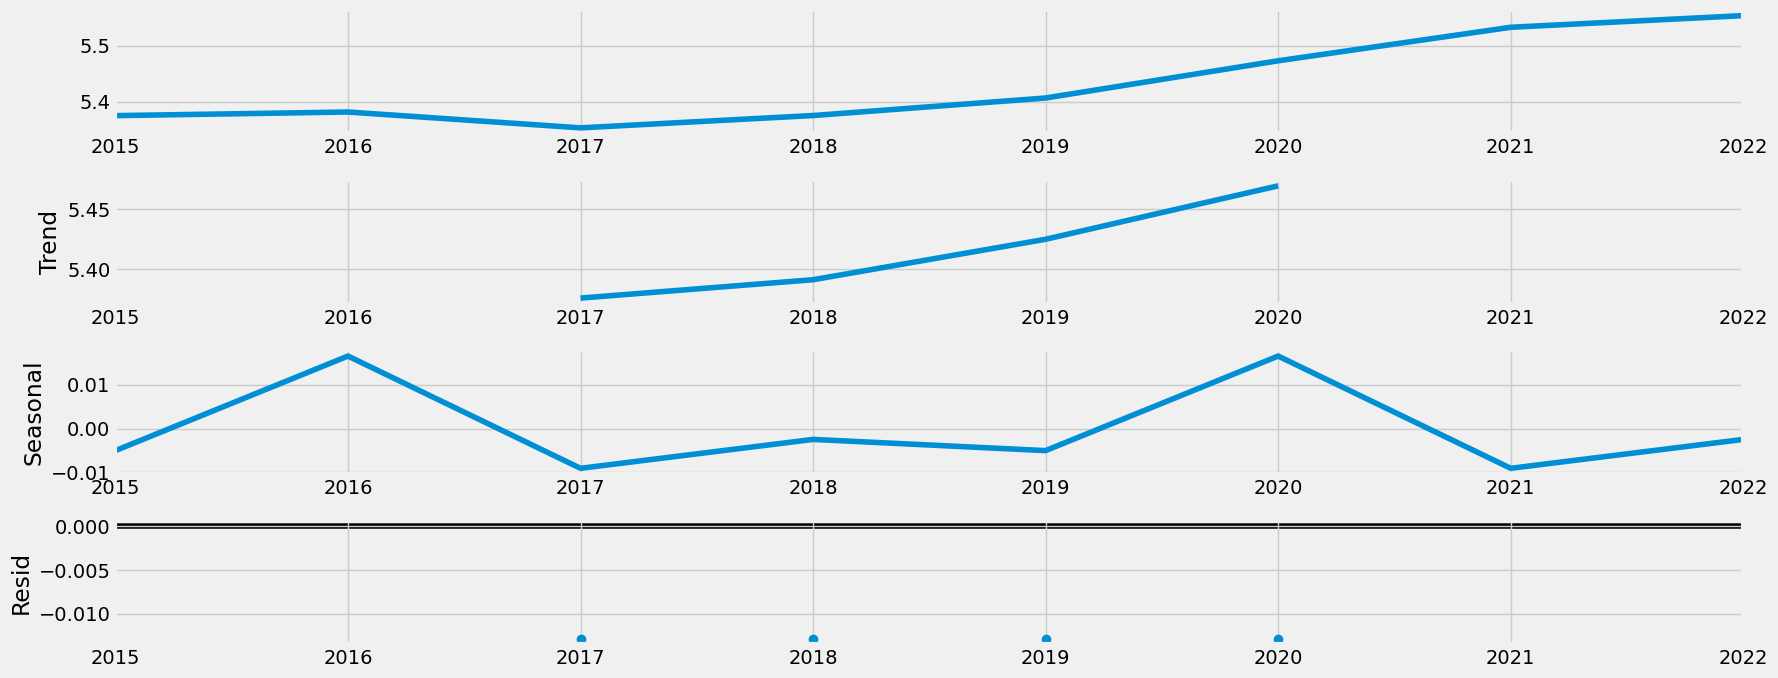

In [23]:
# Plot the separate components
decomposition.plot()
plt.show()

Data does not look stationarity. There is a positive trend from year 2017 to 2020. On the other hand, there seem to be seasonality every 4 years (2016 and 2020).

### 4. Testing for stationarity

In [24]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Happiness_Score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.183196e+01
p-value                        7.952465e-22
Number of Lags Used            2.000000e+00
Number of Observations Used    5.000000e+00
Critical Value (1%)           -6.045114e+00
Critical Value (5%)           -3.929280e+00
Critical Value (10%)          -2.986810e+00
dtype: float64


Test Statistic is not smaller than critical values and p-value is larger than 0.05, therefore we cannot reject our null hypothesis of the presence of a unit root. The data is not stationary.

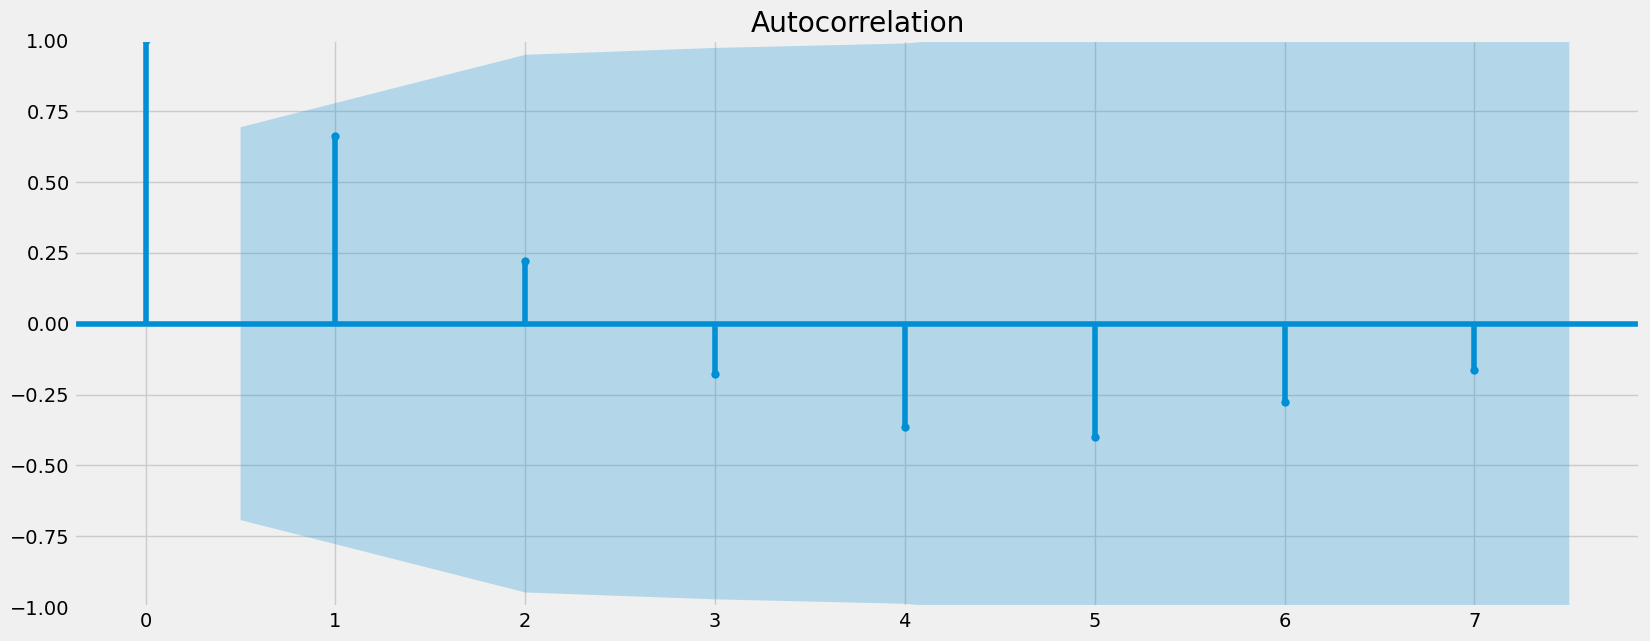

In [25]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### 5. Stationarizing World Happiness Data

In [26]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data_sub - data_sub.shift(1)

In [27]:
# Removing the missing values that came about as a result of the differencing. 
data_diff.dropna(inplace = True)

In [28]:
data_diff.head()

,Happiness_Score
Year,
2016,0.006451
2017,-0.028165
2018,0.021897
2019,0.031179
2020,0.066144


In [29]:
data_diff.columns

Index(['Happiness_Score'], dtype='object')

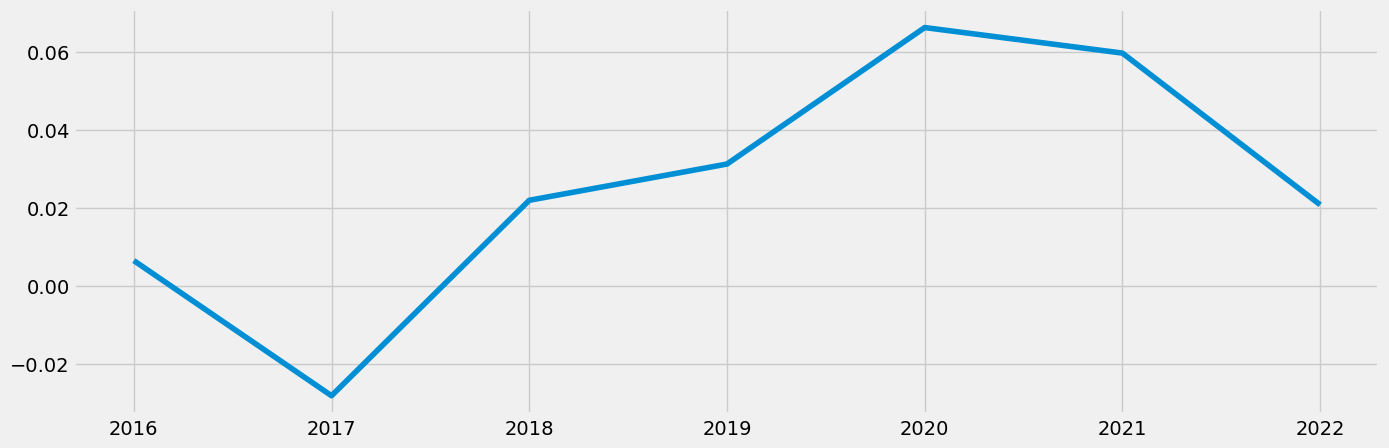

In [30]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [31]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.312326
p-value                        0.623514
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


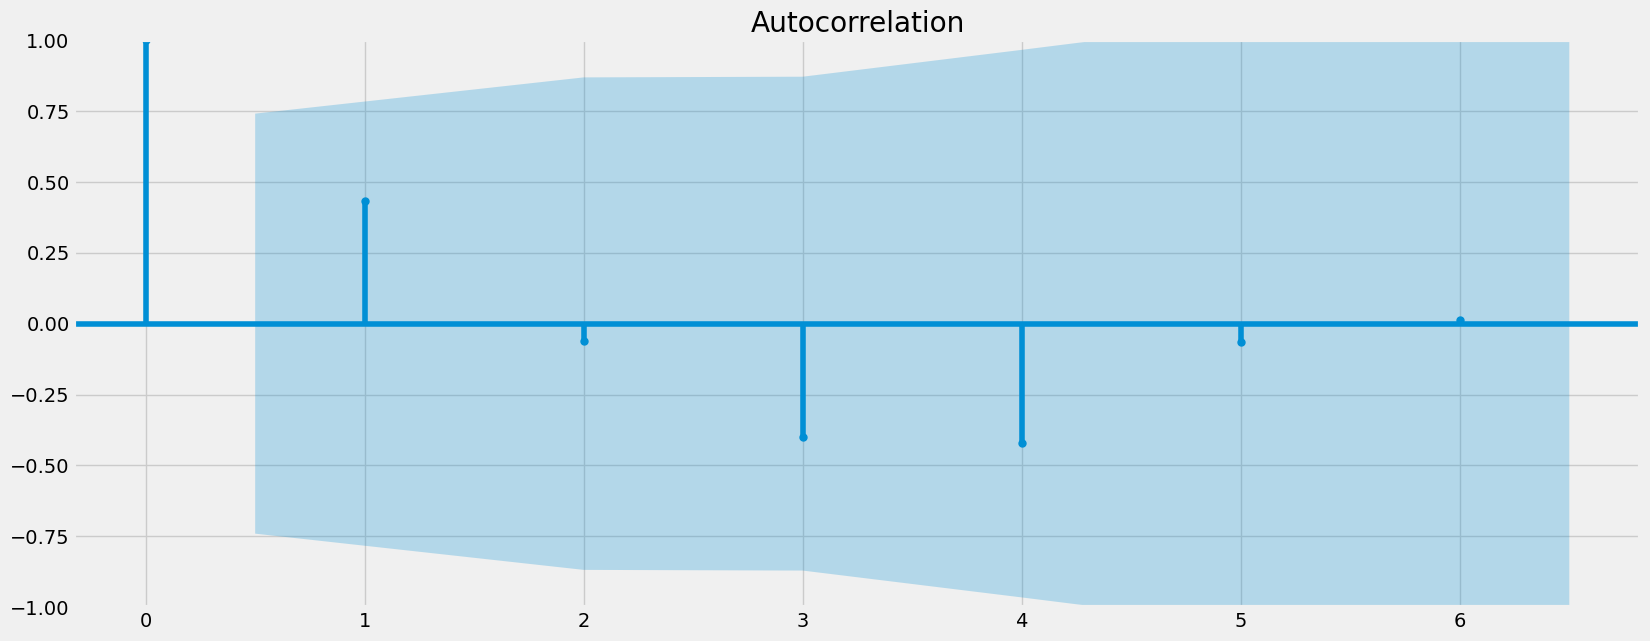

In [32]:
plot_acf(data_diff)
plt.show()

On the autocorrelation graph there is only 1 lag above the confidance interval. Based on these results, the data is now stationary.